### Code to generate trajectories (Beta!)
#### 2021 01 20 CJH

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---
#### making trajectories by hand - neds a lot of points on the corners

In [2]:
# copy x,y,angle data from the smartdash and make a list of them
x_offset, y_offset = 1.2, 0.9
# points used to generate trajectory
plist = [(1.520012,0.910000,0.000000), (2.447216,1.374044,59.807731), (3.359672,2.612377,39.789710), 
         (5.942630,2.809398,0.000000), (6.944320,1.960623,-69.456607), 
         (7.255449,1.207945,0.000000), (8.605512,1.105526,36.654595), 
         (8.717240,2.399724,131.803625), (8.173342,2.724106,178.791021), 
         (7.302003,2.381102,-117.243430), (7.065360,1.737164,-116.747003),
         (6.497403,1.066788,-146.158568), (4.970436,0.852641,178.906396), 
         (3.005862,1.234382,136.592009), (2.316865,2.258568,131.932310),
         (1.423031,2.593755,-179.951353), (1.054474,2.660425,179.761362)]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.52,0.91,0.00,0.32,0.01,0.00
1,2.45,1.37,59.81,1.25,0.47,1.04
2,3.36,2.61,39.79,2.16,1.71,0.69
3,5.94,2.81,0.00,4.74,1.91,0.00
4,6.94,1.96,-69.46,5.74,1.06,-1.21
5,7.26,1.21,0.00,6.06,0.31,0.00
6,8.61,1.11,36.65,7.41,0.21,0.64
7,8.72,2.40,131.80,7.52,1.50,2.30
8,8.17,2.72,178.79,6.97,1.82,3.12
9,7.30,2.38,-117.24,6.10,1.48,-2.05


In [3]:
# generate translation waypoints 
x_offset, y_offset = 1.2, 0.9
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'])):
    out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
    if (ix-2) % 3 == 0:
        out= out+ '\n'
print(out)

geo.Translation2d(0.32, 0.01), geo.Translation2d(1.25, 0.47), geo.Translation2d(2.16, 1.71), 
geo.Translation2d(4.74, 1.91), geo.Translation2d(5.74, 1.06), geo.Translation2d(6.06, 0.31), 
geo.Translation2d(7.41, 0.21), geo.Translation2d(7.52, 1.50), geo.Translation2d(6.97, 1.82), 
geo.Translation2d(6.10, 1.48), geo.Translation2d(5.87, 0.84), geo.Translation2d(5.30, 0.17), 
geo.Translation2d(3.77, -0.05), geo.Translation2d(1.81, 0.33), geo.Translation2d(1.12, 1.36), 
geo.Translation2d(0.22, 1.69), geo.Translation2d(-0.15, 1.76), 


In [4]:
# generate poses
# simple loop test - see that it works and help to tune constants
plist = [(1.287243,0.919311,0.000000), (7.367178,1.058972,0.000000), (8.819659,1.766591,91.521775), 
         (7.255449,2.651115,179.934763), (1.408283,2.604561,179.934763) ]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.29,0.92,0.00,0.09,0.02,0.00
1,7.37,1.06,0.00,6.17,0.16,0.00
2,8.82,1.77,91.52,7.62,0.87,1.60
3,7.26,2.65,179.93,6.06,1.75,3.14
4,1.41,2.60,179.93,0.21,1.70,3.14


In [5]:
# generate pose waypoints
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'],df_slalolm['RAD'])):
    out = out+ f"geo.Pose2d({i[0]:2.2f}, {i[1]:2.2f}, geo.Rotation2d({i[2]:2.2f})), "
    if (ix) % 2 == 0:
        out= out+ '\n'
print(out)

geo.Pose2d(0.09, 0.02, geo.Rotation2d(0.00)), 
geo.Pose2d(6.17, 0.16, geo.Rotation2d(0.00)), geo.Pose2d(7.62, 0.87, geo.Rotation2d(1.60)), 
geo.Pose2d(6.06, 1.75, geo.Rotation2d(3.14)), geo.Pose2d(0.21, 1.70, geo.Rotation2d(3.14)), 



---
#### Measure the feed forward parameters to characterize the drivetrain

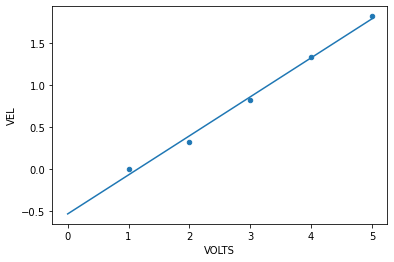

In [6]:
# feed forward - run at a fixed voltage and measure the velocity, generate the intercept and slope for the SimpleMotorFeedForward object
ff_x = [1, 2,    3,    4,    5]
ff_y = [0, 0.33, 0.83, 1.33,  1.82]

df_pid = pd.DataFrame({'VOLTS':ff_x, 'VEL':ff_y})
ax = df_pid.plot('VOLTS', 'VEL', kind='scatter')

par = np.polyfit(ff_x, ff_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [7]:
ks = -intercept/slope
kv = 1/slope
ks, kv

(1.1422413793103465, 2.155172413793103)

---
#### Fitting some distance data - not necessary now that encoders are fixed

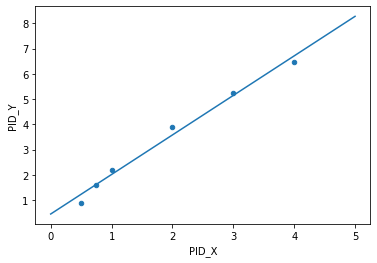

In [8]:
# this used 
pid_x = np.array([0.5,  0.75,  1,    2,    3,    4  ])
pid_y = np.array([0.88, 1.62,  2.20, 3.89, 5.25, 6.48])

df_pid = pd.DataFrame({'PID_X':pid_x, 'PID_Y':pid_y})
ax = df_pid.plot('PID_X', 'PID_Y', kind='scatter')

par = np.polyfit(pid_x, pid_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [9]:
example = [{'points': 50, 'time': '5:00', 'year': 2010}, 
{'points': 25, 'time': '6:00', 'month': "february"}, 
{'points':90, 'time': '9:00', 'month': 'january'}, 
{'points_h1':20, 'month': 'june'}]
pd.DataFrame(example)

,points,time,year,month,points_h1
0,50.0,5:00,2010.0,NaN,NaN
1,25.0,6:00,NaN,february,NaN
2,90.0,9:00,NaN,january,NaN
3,NaN,NaN,NaN,june,20.0


In [50]:
import glob
from pathlib import Path
def get_pathweaver_generators():
    path_files = glob.glob('../robot/pathweaver/paths/*', recursive=True)
    path_names = [Path(file).name for file in path_files]
    return path_names
get_pathweaver_generators()

['barrel_pw0',
 'barrel_pw1',
 'bounce_pw0',
 'bounce_pw1',
 'bounce_pw2',
 'bounce_pw3',
 'calibrate',
 'slalom_pw0',
 'slalom_pw1',
 'slalom_pw2',
 'student_pw0',
 'student_pw1']

In [57]:
df = pd.read_json("pathweaver\\test.json")
df

,acceleration,curvature,pose,time,velocity
0,1.000000,0.000000e+00,"{'rotation': {'radians': 0.012251741656927}, '...",0.000000,0.000000
1,1.000000,7.618384e-01,"{'rotation': {'radians': 0.067001506719573}, '...",0.386395,0.386395
2,0.643426,3.096210e-01,"{'rotation': {'radians': 0.123616520845577}, '...",0.619555,0.619555
3,0.060614,2.260454e-01,"{'rotation': {'radians': 0.143973352135284}, '...",0.737963,0.695742
4,0.003673,1.919865e-01,"{'rotation': {'radians': 0.162167243944589}, '...",0.864458,0.703409
...,...,...,...,...,...
295,-0.686493,2.962929e+00,"{'rotation': {'radians': 2.7614348007707923}, ...",30.786766,0.370881
296,-1.000000,3.390747e+00,"{'rotation': {'radians': 2.8059846493053593}, ...",30.825947,0.343984
297,-1.000000,3.672234e+00,"{'rotation': {'radians': 2.852438273191526}, '...",30.866376,0.303555
298,-1.000000,3.076834e+00,"{'rotation': {'radians': 2.9375029836959072}, ...",30.959530,0.210401


In [58]:
df2 = pd.read_json("pathweaver\\vel_0p75\\output\\slalom_pw1.wpilib.json")
df2

,time,velocity,acceleration,pose,curvature
0,0.000000,0.000000,1.000000,"{'translation': {'x': 1.1, 'y': 0.638750912590...",0.000000e+00
1,0.386395,0.386395,1.000000,"{'translation': {'x': 1.1746023782654271, 'y':...",7.618384e-01
2,0.619555,0.619555,0.643426,"{'translation': {'x': 1.29129459482022, 'y': 0...",3.096210e-01
3,0.737963,0.695742,0.060614,"{'translation': {'x': 1.368463867597908, 'y': ...",2.260454e-01
4,0.864458,0.703409,0.003673,"{'translation': {'x': 1.455918767031672, 'y': ...",1.919865e-01
...,...,...,...,...,...
295,30.786766,0.370881,-0.686493,"{'translation': {'x': 1.626938779023032, 'y': ...",2.962929e+00
296,30.825947,0.343984,-1.000000,"{'translation': {'x': 1.6138240462478879, 'y':...",3.390747e+00
297,30.866376,0.303555,-1.000000,"{'translation': {'x': 1.6013690361781099, 'y':...",3.672234e+00
298,30.959530,0.210401,-1.000000,"{'translation': {'x': 1.578148403057372, 'y': ...",3.076834e+00


In [73]:
df['pose']

0      {'rotation': {'radians': 0.012251741656927}, '...
1      {'rotation': {'radians': 0.067001506719573}, '...
2      {'rotation': {'radians': 0.123616520845577}, '...
3      {'rotation': {'radians': 0.143973352135284}, '...
4      {'rotation': {'radians': 0.162167243944589}, '...
                             ...                        
295    {'rotation': {'radians': 2.7614348007707923}, ...
296    {'rotation': {'radians': 2.8059846493053593}, ...
297    {'rotation': {'radians': 2.852438273191526}, '...
298    {'rotation': {'radians': 2.9375029836959072}, ...
299    {'rotation': {'radians': 2.976443976175113}, '...
Name: pose, Length: 300, dtype: object

In [70]:
np.sqrt(np.sum((df['velocity']-df2['velocity'])**2))

1.4763830667614763e-13

In [19]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\2021\\notebooks'

In [20]:
cd ..

C:\Cory\CJH Shared\Python\FRC\2021


In [21]:
cd robot

C:\Cory\CJH Shared\Python\FRC\2021\robot


In [37]:
df = generate_trajectory('slalom_pw1', 1)

In [39]:
[(row['X'], row['Y']) for ix, row in df.iterrows()]

[(1.1, -3.9332490874095702),
 (2.098016061591557, -3.691100285391916),
 (2.6460370345788813, -2.7862284462733125),
 (3.206802681356607, -2.2190904626003847),
 (3.773940665029535, -1.8877289440499103),
 (5.723875754961174, -2.0342926926395437),
 (6.41846047653813, -2.512217959779651),
 (7.113045198115086, -3.480813167850269),
 (7.986055352757683, -3.640121590230304),
 (8.534076325745005, -3.066611269662176),
 (8.342906218888963, -2.2955585053428025),
 (7.482640738036769, -2.155367093648371),
 (7.062066502953474, -2.486728612198845),
 (6.533162540651756, -3.652866264020708),
 (4.717046525519347, -3.996972456361585),
 (3.26415371341342, -3.799430012610341),
 (2.652409371474082, -3.1685686599853984),
 (2.0342926926395437, -2.690643392845291),
 (1.5563674254994355, -2.397515895666025)]

In [40]:
df

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,-3.933249,0.520091,0.006372,True,False,NaN
1,2.098016,-3.691100,0.210287,0.312245,True,False,NaN
2,2.646037,-2.786228,0.385870,0.478197,False,False,NaN
3,3.206803,-2.219090,0.312245,0.223032,True,False,NaN
4,3.773941,-1.887729,0.560766,0.159308,True,False,NaN
5,5.723876,-2.034293,1.363680,-0.802914,True,False,NaN
6,6.418460,-2.512218,0.274010,-0.356851,True,False,NaN
7,7.113045,-3.480813,0.458808,-0.242149,True,False,NaN
8,7.986055,-3.640122,0.573510,0.452436,True,False,NaN
9,8.534076,-3.066611,0.044606,0.579883,True,False,NaN
